In [7]:
import torch
print(torch.cuda.is_available())

True


In [43]:
from src import analyze_mat_file
file_path = "/home/smatsubara/documents/airlift/data/experiments/rawsignal/P20240726-1600.mat"
analyze_mat_file(file_path)

Analyzing: /home/smatsubara/documents/airlift/data/experiments/rawsignal/P20240726-1600.mat
File size: 3973.64 MB
Successfully loaded .mat file

=== File Metadata ===
__header__: b'PicoScope 7 T&M, Created on: 2025?5?8?'
__version__: 1.0
__globals__: []

=== Variables ===

Variable 1: Tstart
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: float32
  Min: 0.0
  Max: 0.0
  Mean: 0.0

Variable 2: Tinterval
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: float64
  Min: 1.9199999812258284e-08
  Max: 1.9199999812258284e-08
  Mean: 1.9199999812258284e-08

Variable 3: ExtraSamples
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 0
  Max: 0
  Mean: 0.0

Variable 4: RequestedLength
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 260416669
  Max: 260416669
  Mean: 260416669.0

Variable 5: Length
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 260416669
  Max: 260416669
  Mean: 260416669.0

Variab

/home/smatsubara/documents/airlift/.venv/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


  Mean: nan

Variable 8: TDX2
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -inf
  Max: inf
  Mean: nan

Variable 9: TDX3
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -2.3972601890563965
  Max: 2.152641773223877
  Mean: 0.004267964977771044

Variable 10: TDX1_enlarged
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -inf
  Max: inf
  Mean: nan

Total variables: 10

=== Nested Structures ===

Structure of: Tstart
Array: shape=(1, 1), dtype=float32

Structure of: Tinterval
Array: shape=(1, 1), dtype=float64

Structure of: ExtraSamples
Array: shape=(1, 1), dtype=int32

Structure of: RequestedLength
Array: shape=(1, 1), dtype=int32

Structure of: Length
Array: shape=(1, 1), dtype=int32

Structure of: Version
Array: shape=(1,), dtype=<U11

Structure of: TDX1
Array: shape=(1, 260416673), dtype=float32

Structure of: TDX2
Array: shape=(1, 260416673), dtype=float32

Structure of: TDX

In [ ]:
from src import convert_mat2npy
import numpy as np
import os
import scipy.io as sio
file_path = "/home/smatsubara/documents/airlift/data/experiments/rawsignal/P20240726-1600.mat"
output_dir = "/home/smatsubara/documents/airlift/data/experiments/processed"  # Change to your desired directory
processed_data,fs=convert_mat2npy(file_path,start_time=0.0,duration=5.0,amplitude_threshold=2,window_width=0.1e-3,signal_key="TDX1")
# If you want to save fs and other metadata together with processed_data, it is common to use a dictionary and save it as a .npz file.
# You should modify convert_mat2npy to return fs and any other metadata you need.
# Here, as an example, we use a dummy value for fs. In practice, get fs from the return value of convert_mat2npy.
mat_data=sio.loadmat(file_path)
keys=list(mat_data.keys())
print(fs)
print(keys)
# Prepare a dictionary to save both data and metadata
save_dict = {
    "processed_data": processed_data,
    "fs": fs,
    "original_keys": keys,
    # Add other metadata here if needed
}

base_filename = os.path.splitext(os.path.basename(file_path))[0]
save_path = os.path.join(output_dir, f"{base_filename}_processed.npz")
np.savez(save_path, **save_dict)
print(f"Processed data and metadata saved to: {save_path}")

Loading data...
Loading successful
Using device: cuda
Number of detected triggers: (15000,)
triggers.shape: (15000,)
signal_chunk.shape: (260416669,)
fs: 52083333.842615336
arranged_pulses_tdx1.shape: (15000, 5208)
arranged_pulses.shape: (15000, 5208, 4)
52083333.842615336
['__header__', '__version__', '__globals__', 'Tstart', 'Tinterval', 'ExtraSamples', 'RequestedLength', 'Length', 'Version', 'TDX1', 'TDX2', 'TDX3', 'TDX1_enlarged']
Processed data and metadata saved to: /home/smatsubara/documents/airlift/data/experiments/processed/P20240726-1600_processed.npz


Keys in npz file: ['processed_data', 'fs', 'keys']
['__header__' '__version__' '__globals__' 'Tstart' 'Tinterval'
 'ExtraSamples' 'RequestedLength' 'Length' 'Version' 'TDX1' 'TDX2' 'TDX3'
 'TDX1_enlarged']
processed_data shape: (15000, 5208, 4)
Pulse shape: (5208,)


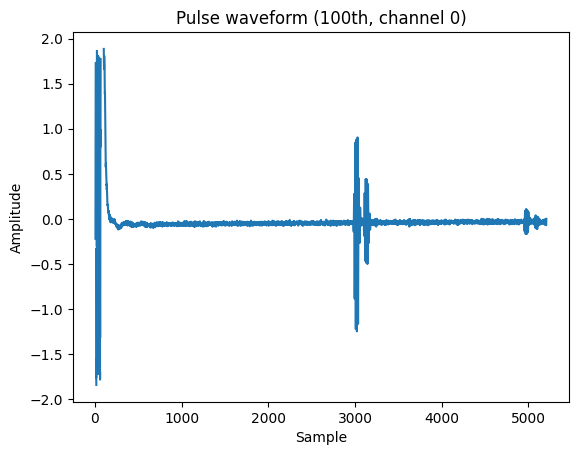

In [13]:
import numpy as np
import scipy.io as sio
import torch
from typing import List, Tuple, Optional
import matplotlib.pyplot as plt

file_path = "/home/smatsubara/documents/airlift/data/experiments/processed/P20240726-1600_processed.npz"

# Load the npz file
data = np.load(file_path)
# Print the keys in the npz file
# Print the keys in the npz file as a list of strings for better readability
print("Keys in npz file:", list(data.keys()))
print(data["keys"])
# Extract the processed_data array
processed_data = data["processed_data"]
print("processed_data shape:", processed_data.shape)

# Visualize the 100th pulse of the first channel
pulse = processed_data[100, :, 0]
print("Pulse shape:", pulse.shape)
plt.plot(pulse)
plt.title("Pulse waveform (100th, channel 0)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()